In [1]:
library(ggplot2)
library(maps)
#library(rnaturalearth)
##library(tidyverse)

In [2]:
#ne_countries(returnclass = "sf", continent = "europe") %>% 
#    ggplot() +
#    geom_sf()

In [3]:
v1 <- rnaturalearth::ne_countries(country = c("United States of America", "Russia"))
v2 <- ggplot2::fortify(v1)
head(v2)

Regions defined for each Polygons


,long,lat,order,hole,piece,id,group
,<dbl>,<dbl>,<int>,<lgl>,<fct>,<chr>,<fct>
1,-122.8400,49,1,FALSE,1,4,4.1
2,-120.0000,49,2,FALSE,1,4,4.1
3,-117.0312,49,3,FALSE,1,4,4.1
4,-116.0482,49,4,FALSE,1,4,4.1
5,-113.0000,49,5,FALSE,1,4,4.1
6,-110.0500,49,6,FALSE,1,4,4.1


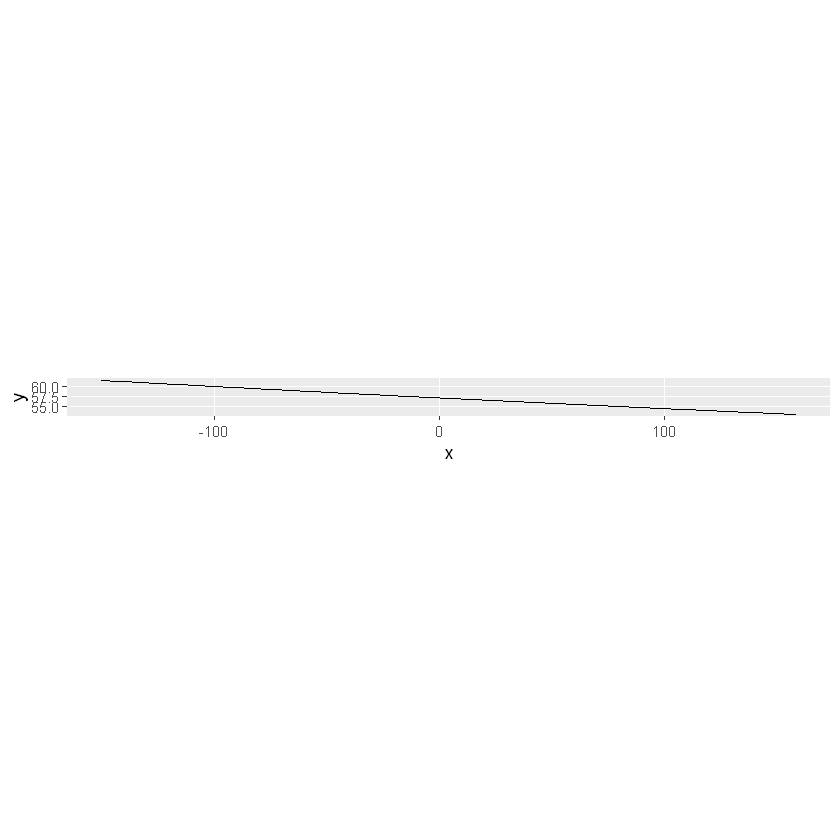

In [4]:
ggplot() +
    geom_segment(aes(x = 158.634805, y = 53.038483, xend = -149.863129, yend = 61.217381)) +
    coord_map()

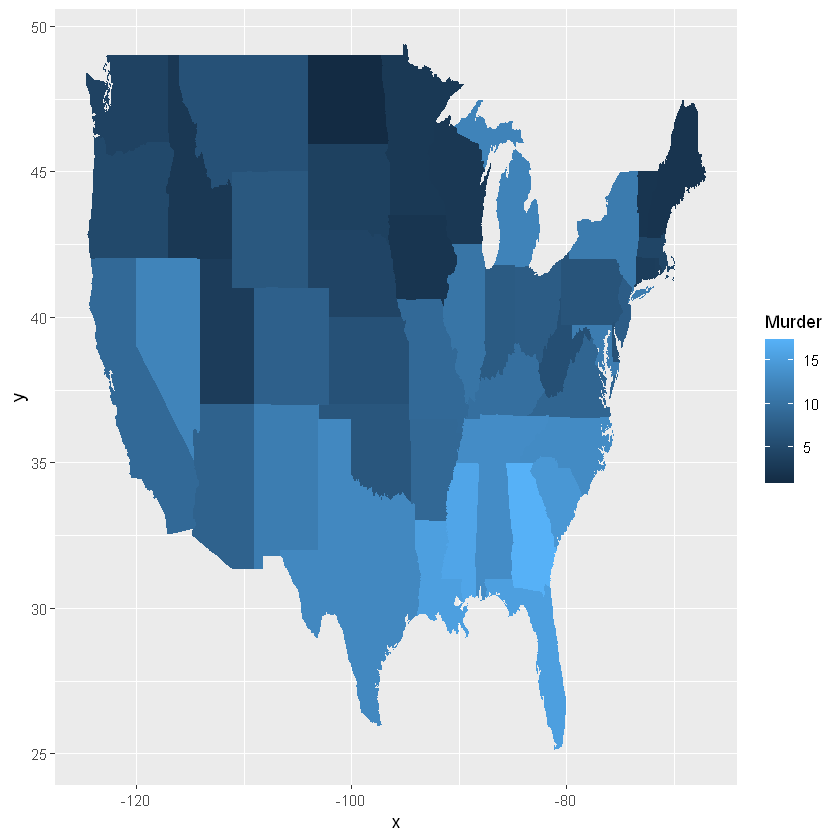

In [5]:
crimes <- data.frame(state = tolower(rownames(USArrests)), USArrests)

# Equivalent to crimes %>% tidyr::pivot_longer(Murder:Rape)
vars <- lapply(names(crimes)[-1], function(j) {
data.frame(state = crimes$state, variable = j, value = crimes[[j]])
})
crimes_long <- do.call("rbind", vars)

states_map <- map_data("state")

# without geospatial coordinate system, the resulting plot
# looks weird
ggplot(crimes, aes(map_id = state)) +
geom_map(aes(fill = Murder), map = states_map) +
expand_limits(x = states_map$long, y = states_map$lat)

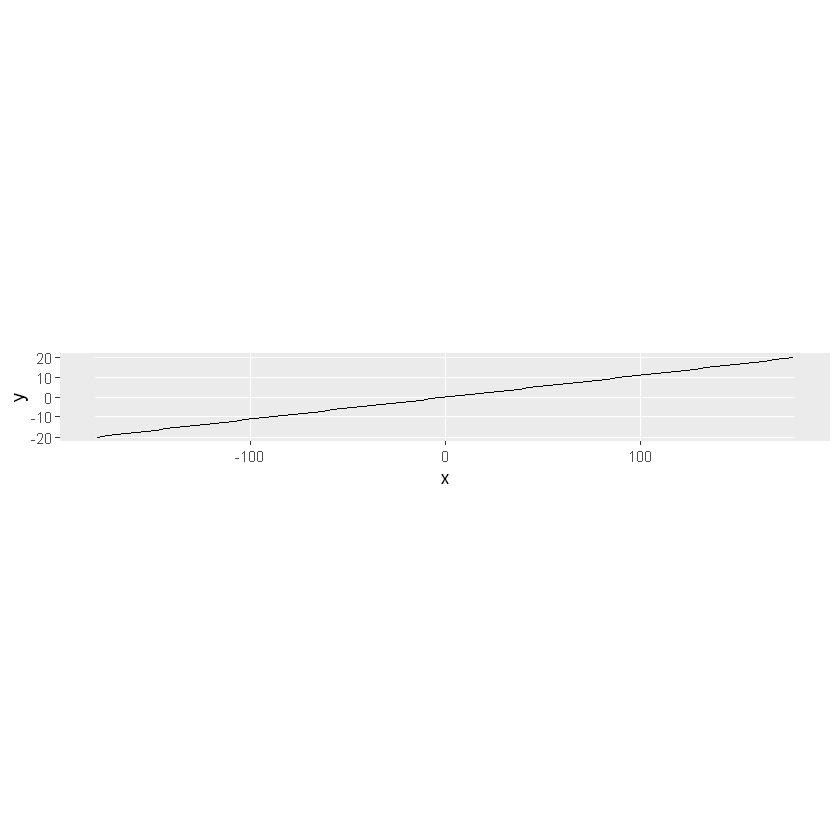

In [6]:
# Sample data
data <- data.frame(
  x = c(-179, 179),
  y = c(-20, 20)
)

# Create plot
ggplot(data, aes(x = x, y = y)) +
  geom_segment(aes(x = x[1], y = y[1], xend = x[2], yend = y[2])) +
  coord_map(xlim = c(-180, 180))

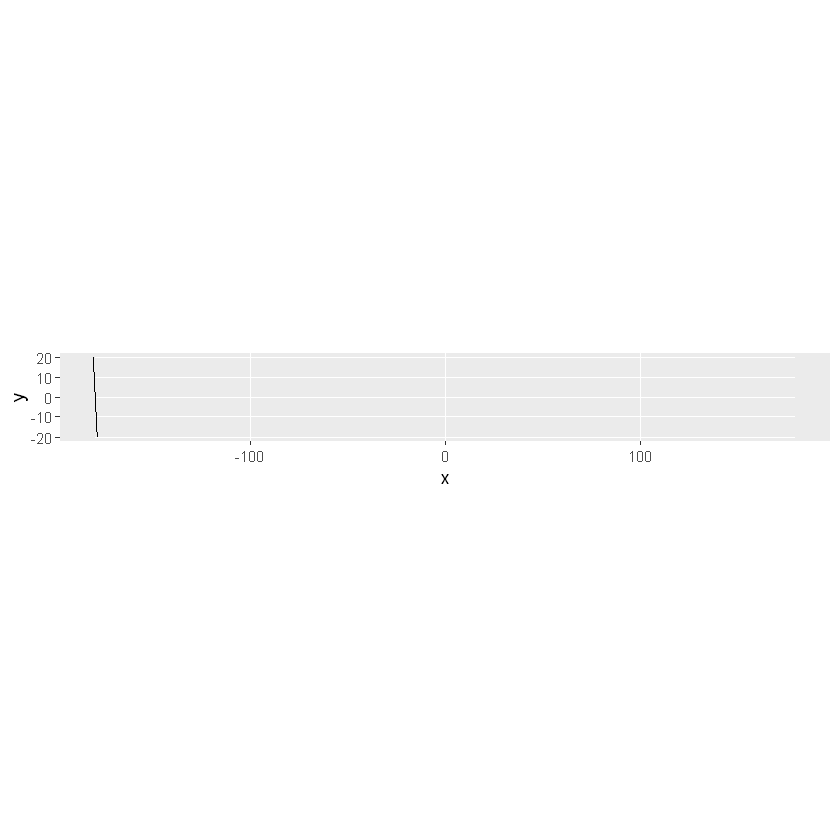

In [7]:
# Sample data
data <- data.frame(
  x = c(-179, 179),
  y = c(-20, 20)
)

# Create plot
ggplot(data, aes(x = x, y = y)) +
  geom_segment(
    aes(x = x[1], y = y[1], xend = ifelse(abs(x[2]-x[1]) > 180, x[2]-360, x[2]), yend = y[2])
  ) +
  coord_map(xlim = c(-180, 180))